In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df.head()

,test_id,robot_count,mission_size,sample_id,method,running_mode,completion_time,average_idle_time
0,202412101329_test_2_10_0_m3.log,2,10,0,multi3,standard,213.004287,8.258729
1,202412101831_test_5_2_2_m3.log,5,2,2,multi3,standard,34.503264,23.405516
2,202412111551_Mtest_10_10_0_m3.log,10,10,0,multi3,mm_interleaved,55.506890,17.414188
3,202412101916_test_5_15_2_bl.log,5,15,2,baseline,standard,451.512532,351.922486
4,202412102039_test_10_2_2_bl.log,10,2,2,baseline,standard,66.008101,59.408862


In [13]:
x_m3 = df[ (df["mission_size"] == 2) & \
                   (df["running_mode"] == "standard") &\
                   (df["method"] == "multi3")
                ]
x_m3["average_idle_time"].mean()

24.96311093436347

In [24]:
def get_idle_time(df):
    mission_sizes = [2,10,15,20]
    for ms in mission_sizes:
        x_m3 = df[ (df["mission_size"] == ms) & \
                   (df["running_mode"] == "standard") &\
                   (df["method"] == "multi3") &\
                   (df["sample_id"] == 0)
                ][["average_idle_time"]]
        # print(x_m3)
        m3_idle = x_m3.mean()
        
        x_bl = df[ (df["mission_size"] == ms) & \
                   (df["running_mode"] == "standard") &\
                   (df["method"] == "baseline") &\
                   (df["sample_id"] == 0)
                ][["average_idle_time"]]
        bl_idle = x_bl.mean()
        print(f"MS:{ms} | -- m3  {m3_idle} -- | -- bl  {bl_idle} --") 
        # print()
get_idle_time(df)

MS:2 | -- m3  average_idle_time    24.355888
dtype: float64 -- | -- bl  average_idle_time    48.183918
dtype: float64 --
MS:10 | -- m3  average_idle_time    18.463755
dtype: float64 -- | -- bl  average_idle_time    224.010089
dtype: float64 --
MS:15 | -- m3  average_idle_time    20.766251
dtype: float64 -- | -- bl  average_idle_time    349.684622
dtype: float64 --
MS:20 | -- m3  average_idle_time    63.640844
dtype: float64 -- | -- bl  average_idle_time    412.775671
dtype: float64 --


In [ ]:
def get_idle_time(df):
    mission_sizes = [2,10,15,20]
    for ms in mission_sizes:
        x_m3 = df[ (df["mission_size"] == ms) & \
                   (df["running_mode"] == "standard") &\
                   (df["method"] == "multi3")
                ][["average_idle_time"]]
        # print(x_m3)
        m3_idle = x_m3.mean()
        
        x_bl = df[ (df["mission_size"] == ms) & \
                   (df["running_mode"] == "standard") &\
                   (df["method"] == "baseline")
                ][["average_idle_time"]]
        bl_idle = x_bl.mean()
        print(f"MS:{ms} | -- m3  {m3_idle} -- | -- bl  {bl_idle} --") 
        # print()
get_idle_time(df)

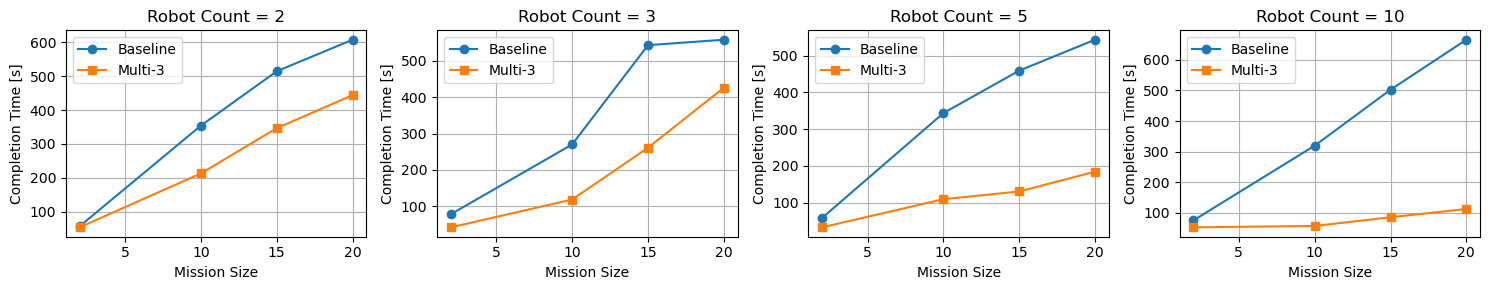

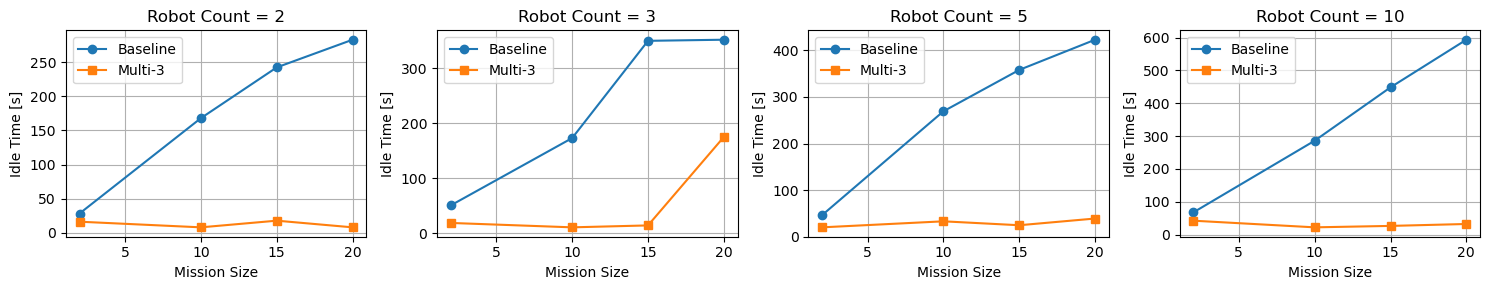

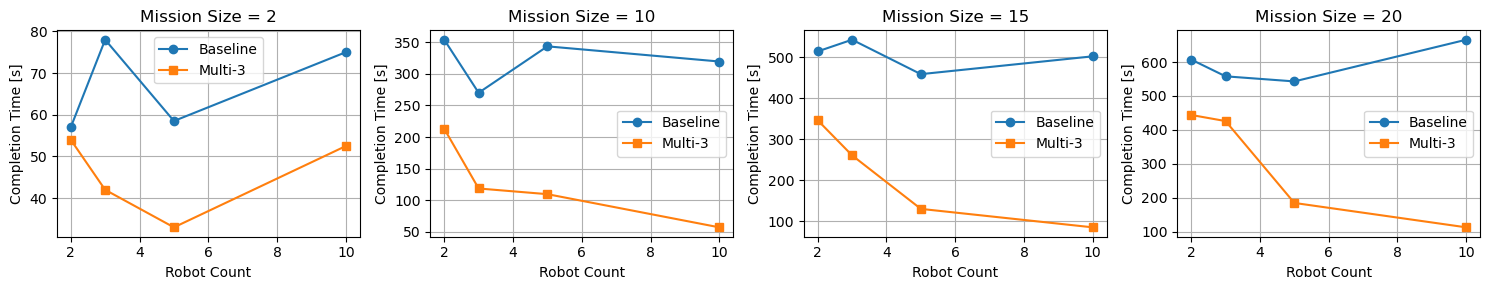

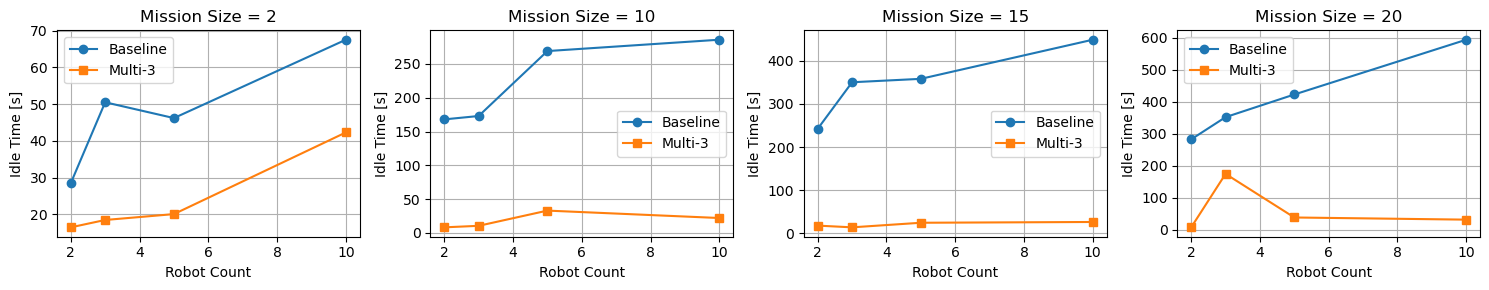

In [7]:
def multiplot(df,fname,external_variable,ext_values,var_x,var_y,title,x_label,y_label, sample_id=1):
    """Receive title with a placeholder $field$"""
    fig, axes = plt.subplots(1, 4, figsize=(15, 3))
    for i, v in enumerate(ext_values):
        x_df = df[ (df[external_variable] == v) & \
                   (df["running_mode"] == "standard") & \
                   (df["sample_id"] == sample_id)
             ][[var_x,var_y,"method"]]
        fil_bl_df = x_df[x_df["method"] == "baseline"]
        sort_bl_df = fil_bl_df.sort_values(by=var_x)

        fil_m3_df = x_df[x_df["method"] == "multi3"]
        sort_m3_df = fil_m3_df.sort_values(by=var_x)

        bl_x = sort_bl_df[var_x].to_numpy()
        bl_y = sort_bl_df[var_y].to_numpy()
        m3_x = sort_m3_df[var_x].to_numpy()
        m3_y = sort_m3_df[var_y].to_numpy()

        axes[i].plot(bl_x,bl_y, marker='o', label='Baseline')
        axes[i].plot(m3_x,m3_y, marker='s', label='Multi-3')
        axes[i].set_title(title.replace("$field$",str(v)))
        axes[i].set_ylabel(y_label)
        axes[i].set_xlabel(x_label)
        axes[i].legend()
        axes[i].grid()
    plt.tight_layout()
    plt.savefig(fname, format="pdf")
    plt.show()

multiplot(df, "images/ct_by_rc4.pdf", "robot_count", [2,3,5,10],"mission_size"
        ,"completion_time","Robot Count = $field$", "Mission Size", "Completion Time [s]",0)
multiplot(df, "images/it_by_rc4.pdf", "robot_count", [2,3,5,10],"mission_size"
        ,"average_idle_time","Robot Count = $field$", "Mission Size", "Idle Time [s]",0)

multiplot(df, "images/ct_by_ms4.pdf", "mission_size", [2,10,15,20],"robot_count"
        ,"completion_time","Mission Size = $field$", "Robot Count", "Completion Time [s]",0)
multiplot(df, "images/it_by_ms4.pdf", "mission_size", [2,10,15,20],"robot_count"
        ,"average_idle_time","Mission Size = $field$", "Robot Count", "Idle Time [s]",0)